In [1]:
#importing used libraries
import csv
import re
from functools import reduce
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this aux function reads the CSV file and returns the data in a Python dictionary
def get_data_csv(link):
    collection = []
    with open(link, 'r', encoding="mbcs") as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection

# construct a dict containing all sunshine data
sunDict = {}
years = []
toAppend = ""
for i in range (1996, 2021):
    years.append(i)
    toAppend = "sunshine" + str(i) + ".csv"
    sunDict[toAppend] = (pd.DataFrame(get_data_csv(toAppend))).drop_duplicates().rename(columns ={"Salary paid" : "Salary Paid", "Calendar year" : "Calendar Year"}).rename(columns ={"Salary Paid " : "Salary Paid"})
    #if you're wondering why this line is so long, it's because the sunshine lists changed their key formats randomly.
    #slight fix, there were duplicate entries in the dataframes. Added command to drop them.

print(years)

[1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [12]:
#The csv for 2016 was messed up, so I made this quick fix
sunDict['sunshine2016.csv']['Calendar Year'] = 2016
sunDict['sunshine2016.csv']['Calendar Year'].unique()

array([2016], dtype=int64)

In [3]:
sunDict['sunshine2020.csv'].head()

,Sector,Last name,First name,Salary Paid,Taxable benefits,Employer,Job title,Calendar Year
0,Colleges,Aarts,Cheri,"$113,586.57",$71.01,Fanshawe College Of Applied Arts and Technology,Professor,2020
1,Colleges,Aaslepp,Drew,"$113,685.85",$117.26,Humber College Institute Of Technology and Adv...,Professor,2020
2,Colleges,Abba,Corinne,"$102,214.17",$117.36,George Brown College Of Applied Arts and Techn...,Librarian,2020
3,Colleges,Abbott,Brian,"$102,855.46",$117.36,Conestoga College Institute Of Technology and ...,Professor,2020
4,Colleges,Abbott,Kathleen,"$160,854.89",$326.33,George Brown College Of Applied Arts and Techn...,"Associate Dean, Centre for Continuous Learning",2020


In [4]:
#1. Mean Salary of each year.
    #a) Find mean Salary of each year.
    #b) Graph means.

sunMeans = [] #sunMeans is ordered 1996 to 2020

for i in sunDict:
    sunMeans.append((sunDict[i])['Salary Paid'].replace('[\$,]', '', regex=True).astype(float).mean())



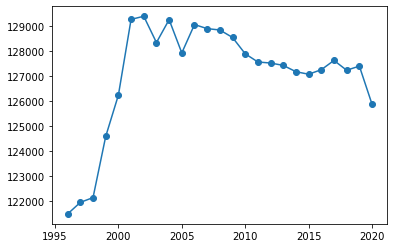

In [5]:
plt.plot(years, sunMeans, marker = 'o')

Above plot is interesting.
Could learn more by seperating each year into quartiles and then taking the mean of each quartile over the years.

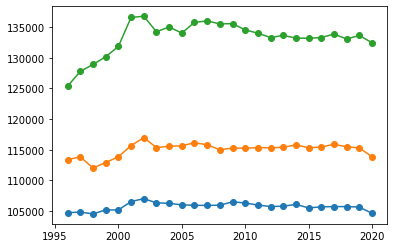

In [6]:
#2) Mean salary of each quartile in each year
    #a) Seperate each year into quartiles
    #b) Find mean salary of each quartile in each year
    #c) Generate graphs to understand results.

sunQ1 = []
sunQ2 = []
sunQ3 = []


for i in sunDict:
    sunQ1.append((sunDict[i])['Salary Paid'].replace('[\$,]', '', regex=True).astype(float).quantile([0.25])[0.25])
    sunQ2.append((sunDict[i])['Salary Paid'].replace('[\$,]', '', regex=True).astype(float).quantile([0.5])[0.5])
    sunQ3.append((sunDict[i])['Salary Paid'].replace('[\$,]', '', regex=True).astype(float).quantile([0.75])[0.75])
plt.plot(years, sunQ1, marker = 'o', color = 'tab:blue')
plt.plot(years, sunQ2, marker = 'o', color = 'tab:orange')
plt.plot(years, sunQ3, marker = 'o',color = 'tab:green')

First graph is all quartiles on one chart. Lost a lot of detail due to the scale of the graph. Graph each quartile individually.

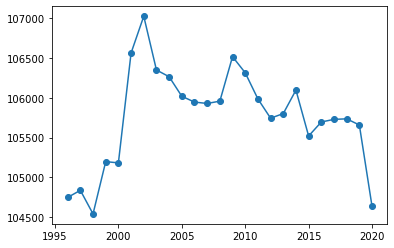

In [7]:
plt.plot(years, sunQ1, marker = 'o', color = 'tab:blue')

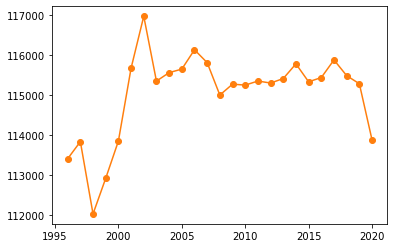

In [8]:
plt.plot(years, sunQ2, marker = 'o', color = 'tab:orange')

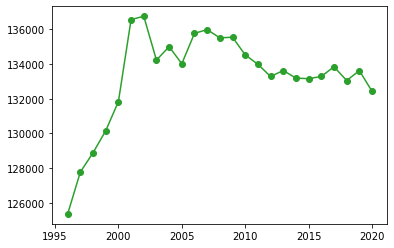

In [9]:
plt.plot(years, sunQ3, marker = 'o', color = 'tab:green')

Second set of graphs provides better detail.

Mean income grew significantly in each quartile between 1998 and 2002.

Mean income dropped significantly in quartiles 1 and 2 from 2019 to 2020. Not a significant drop in quartile 3.

The graphs could be influenced by the amount of people in each year. Consider also graphing based on a percentage of the top earner's income. 

More detail could be obtained by splitting the graphs into deciles instead of quartiles, but that would be more difficult to analyze. I'll consider it as a stretch goal.

Doing a scatterplot of salaries with seaborn might be useful for further insights.



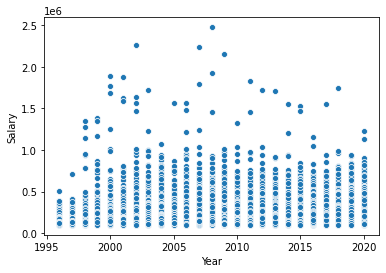

In [17]:
#3. Scatterplot.
    #a) Make initial dataframe with parameters "Salary" and Year"
    #b) Append data
    #c) Graph

forScatter = pd.DataFrame({'Salary': sunDict['sunshine2020.csv']['Salary Paid'].replace('[\$,]', '', regex=True).astype(float), 'Year': sunDict['sunshine2020.csv']['Calendar Year'].astype(int)})
    
for i in sunDict:
    if i == 'sunshine2020.csv':
        break
    else:
        forScatter = forScatter.append(pd.DataFrame({'Salary': sunDict[i]['Salary Paid'].replace('[\$,]', '', regex=True).astype(float), 'Year': sunDict[i]['Calendar Year'].astype(int)}))
sns.scatterplot(data = forScatter, x = "Year", y = "Salary")

As with the last graph, a lot of detail is lost. I'll generate a second graph of each quartile to provide better detail.

In [19]:
#4. Scatterplot Quartiles.
    #a) Make initial dataframe for each quartile with parameters "Salary" and Year"
    #b) Append data
    #c) Graph

forScatterQ1 = pd.DataFrame({'Salary': sunDict['sunshine2020.csv']['Salary Paid'].replace('[\$,]', '', regex=True).astype(float).quantile([0.25])[0.25], 'Year': sunDict['sunshine2020.csv']['Calendar Year'].astype(int)})
forScatterQ2 = pd.DataFrame({'Salary': sunDict['sunshine2020.csv']['Salary Paid'].replace('[\$,]', '', regex=True).astype(float).quantile([0.5])[0.5], 'Year': sunDict['sunshine2020.csv']['Calendar Year'].astype(int)})
forScatterQ3 = pd.DataFrame({'Salary': sunDict['sunshine2020.csv']['Salary Paid'].replace('[\$,]', '', regex=True).astype(float).quantile([0.75])[0.75], 'Year': sunDict['sunshine2020.csv']['Calendar Year'].astype(int)})

for i in sunDict:
    if i == 'sunshine2020.csv':
        break
    else:
        forScatterQ1 = forScatterQ1.append(pd.DataFrame({'Salary': sunDict[i]['Salary Paid'].replace('[\$,]', '', regex=True).astype(float).quantile([0.25])[0.25], 'Year': sunDict[i]['Calendar Year'].astype(int)}))
        forScatterQ2 = forScatterQ2.append(pd.DataFrame({'Salary': sunDict[i]['Salary Paid'].replace('[\$,]', '', regex=True).astype(float).quantile([0.5])[0.5], 'Year': sunDict[i]['Calendar Year'].astype(int)}))
        forScatterQ3 = forScatterQ3.append(pd.DataFrame({'Salary': sunDict[i]['Salary Paid'].replace('[\$,]', '', regex=True).astype(float).quantile([0.75])[0.75], 'Year': sunDict[i]['Calendar Year'].astype(int)}))

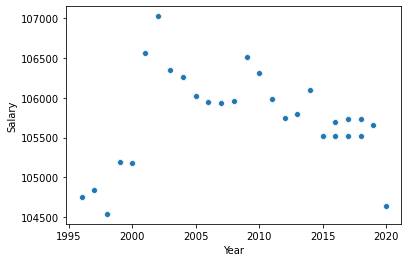

In [20]:
sns.scatterplot(data = forScatterQ1, x = "Year", y = "Salary")

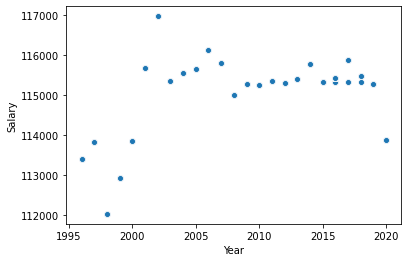

In [21]:
sns.scatterplot(data = forScatterQ2, x = "Year", y = "Salary")

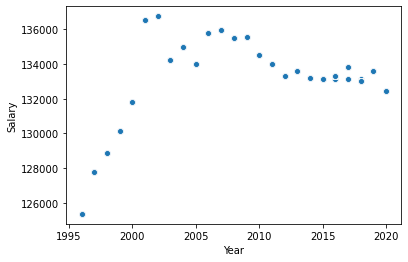

In [22]:
sns.scatterplot(data = forScatterQ3, x = "Year", y = "Salary")

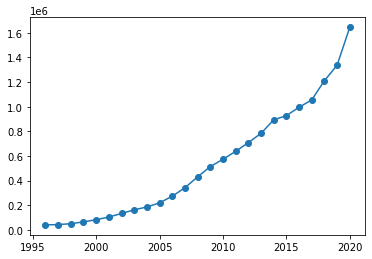

In [15]:
#5. Amount of sunshine list entries in each year
    #a) Count entries in each year
    #b) Graph
sunSize = []

for i in sunDict:
    sunSize.append(sunDict[i].size)

plt.plot(years, sunSize, marker = 'o')

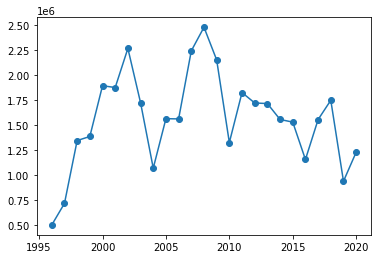

In [14]:
#6. Highest Salary in each year
    #a) Make list of highest salaries
    #b) Graph

sunHighest = []

for i in sunDict:
    sunHighest.append(sunDict[i]['Salary Paid'].replace('[\$,]', '', regex=True).astype(float).max())

plt.plot(years, sunHighest, marker = 'o')

The amount of entries in the sunshine list has increased significantly over the past two decades. The mean salary per quartile per year graphs are likely affected by this.

The highest salary flucuates, but is relativley stable. I would have also graphed the mean salary per year in fractions of the highest salary, but I ran out of time.

In [83]:
#sunDict['sunshine2006.csv']['Salary Paid'].replace('[\$,]', '', regex=True).astype(float).idxmax()

In [84]:
#sunDict['sunshine2006.csv'].iloc[31664]

While graphing the highest salaries in each year, I noticed that 2006 had two data points that were entered incorrectly with the decimal point being swapped for a comma.

One of them was point 31664 (aka Joanne). Instead of Joanne's salary being 127,455.00, it was instead listed as 127,455,00.

The two cells above were used for debugging, and are left in as comments.